<a href="https://colab.research.google.com/github/Panchol211/week8_Nairobi-_hospital_IP/blob/main/week8_Nairobi__hospital_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the research question




Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid

# Defining the Metric for Success

This project will be considered a success when are able to develop a prediction model that has a high level of accuracy, does not suffer from instances of overfitting or underfitting and has a good bias-variance tradeoff balance

# Understanding the context 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients and the hospital want to develop an algorithm that can predict if the patient has hypothoid.
This research aims to use robust machine learning algorithms to develop a prediction model that can identify whether or not a patient has a hypothyroid condition based on their symptoms. The model will be trained on thyroid patients' data that was collected by Nairobi Hospital.

# Exprimental Design


Below are the steps followed in this analysis to ensure that the research question is addresed comprehensively:


  
Data sourcing and understanding

Data cleaning

Exploratory Analysis

Implementing the Solution (DecisionTrees and SVM)

Findings and recomendations 





 





In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Reading dataset 

In [87]:
#loading and reading the dataset 

thyroid = pd.read_csv('hypothyroid.csv')
thyroid.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.1,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.7,y,1.3,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.9,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.6,y,1.02,y,7.5,n,?


In [88]:
#checking the the shape to know the diamension of the data
thyroid.shape

(3163, 26)

In [89]:
# checking the data type of attributes

thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [90]:
# Checking all unique variables for each column

thyroid.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [91]:
#checking for unique status in the dataset
thyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

The two status the person can have are hypothyroid and negative 

In [92]:
# Checking for unique values in all columns in the dataset
for uni in thyroid.columns:
#   print(hypo.columns)
  print("\t")
  print(thyroid[uni].unique())

	
['hypothyroid' 'negative']
	
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
	
['M' 'F' '?']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['y' 'n']
	
['30' '145' '0' '430' '7.3' '138' '7.7' '21' '92' '48' '36' '15' '15.3'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.4' '126'
 '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.2' '150' '?'
 '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17' '235' '153'
 '13' '31' '109' '260' '43' '12' '11' '55' '6.5'

# Cleaning the data 

In [93]:
# Removing the question marks in each column - data cleaning
#replacing the ? is nan value 
thyroid.replace('?',np.nan,inplace=True)
thyroid.sample(n=5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
382,negative,NaN,M,f,f,f,f,f,f,f,f,f,f,f,y,0.7,y,2.6,y,100,y,1.04,y,96,n,NaN
3121,negative,66,F,t,f,f,f,t,f,f,f,f,f,f,y,0,y,2.1,y,139,y,1.1,y,126,n,NaN
507,negative,61,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.9,y,118,y,0.96,y,123,n,NaN
2833,negative,NaN,M,t,f,f,f,f,f,f,f,f,f,f,y,7.6,y,1,y,86,y,0.84,y,102,n,NaN
875,negative,19,F,f,f,f,f,f,f,f,f,f,f,f,y,6,y,1.4,y,106,y,1.13,y,94,n,NaN


In [94]:
# Checking number of null values
thyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

From the data we can see that there are a lot of null values, it is very difficult to know why this data is missing or it was not important during the resarch process.I can replace the missing values with either mode as in sex or median as in age, this will distort the data.
I will assume that the data which is available is important and the missing values will be dropped 

In [95]:
# dropping null values on specific columns

thyroid = thyroid[thyroid['age'].notna()]
thyroid = thyroid[thyroid['sex'].notna()]
thyroid = thyroid[thyroid['TSH'].notna()]
thyroid = thyroid[thyroid['T3'].notna()]

In [96]:
# dropping the column TBG_measured and TBG

thyroid = thyroid.drop(['TBG_measured', 'TBG'], axis =1)

In [97]:
# confirming that there are no more nulls

thyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

In [98]:
# checking for duplicate records

thyroid.duplicated().sum()

54

In [99]:
# display duplicate records

dupli = thyroid[thyroid[['status', 'age', 'sex', 'FTI', 'T4U', 'TT4', 'T3', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']].duplicated()]
dupli

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.8,y,53,y,0.86,y,61
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.4,y,10,y,1,y,10
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.5,y,33,y,0.67,y,49
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.6,y,47,y,0.97,y,48
132,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,7.3,y,2.4,y,66,y,1.09,y,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,0.8,y,111,y,0.68,y,165
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.1,y,107,y,1.05,y,103
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.8,y,126,y,1.18,y,107
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.9,y,82,y,0.8,y,103


We can see from the dups output, there are duplicates but they are not real duplicate and they will be kept for analysis.

In [100]:
# converting datatype into appropriate datatype for analysis for analysis

thyroid['age'] = thyroid['age'].astype(str).astype(int)
thyroid[["TSH", "T3", 'TT4', 'T4U', 'FTI']] = thyroid[["TSH", "T3", 'TT4', 'T4U', 'FTI']].apply(pd.to_numeric)

In [101]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2000 non-null   object 
 1   age                        2000 non-null   int64  
 2   sex                        2000 non-null   object 
 3   on_thyroxine               2000 non-null   object 
 4   query_on_thyroxine         2000 non-null   object 
 5   on_antithyroid_medication  2000 non-null   object 
 6   thyroid_surgery            2000 non-null   object 
 7   query_hypothyroid          2000 non-null   object 
 8   query_hyperthyroid         2000 non-null   object 
 9   pregnant                   2000 non-null   object 
 10  sick                       2000 non-null   object 
 11  tumor                      2000 non-null   object 
 12  lithium                    2000 non-null   object 
 13  goitre                     2000 non-null   objec

# Checking for outliers in the dataset 

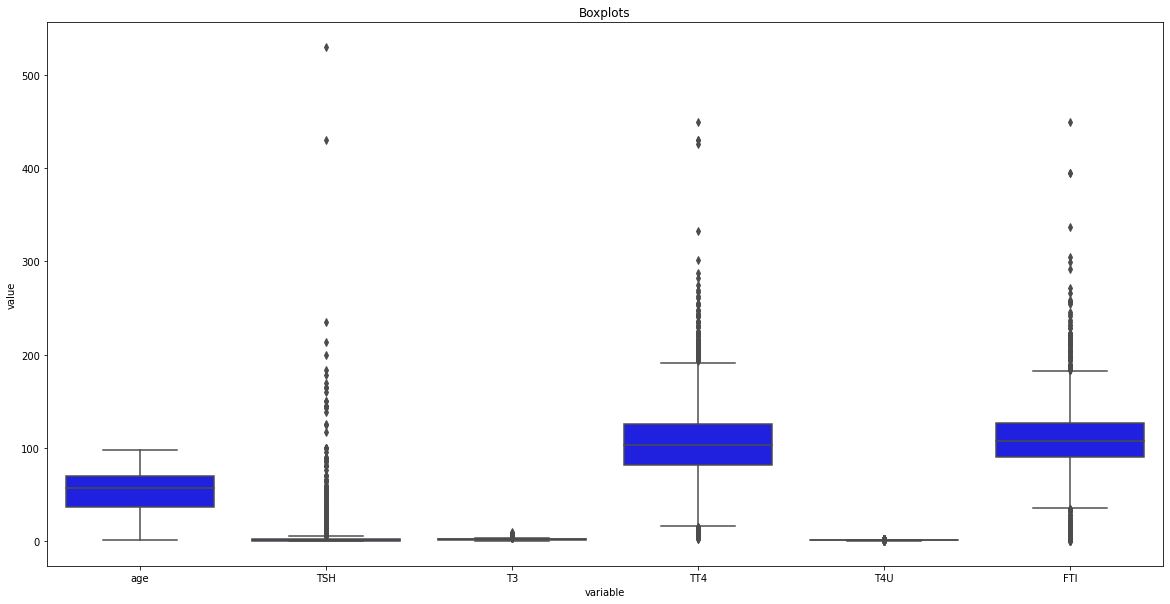

In [102]:
# using boxplots to check for outliers

boxplot = pd.DataFrame(data = thyroid, columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI'])

plt.figure(figsize=(20,10))

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')


plt.show()

The dataset has a lot of outliers but this extreme values could be an important part of the data collection therefore we shall keep them.

# Checking for Anomalies

In [103]:
# calculating the interquatile range

q1 = thyroid['TSH'].quantile(0.25)
q3 = thyroid['TSH'].quantile(0.75)
iqr1 = q3 - q1

# calculating the interquartile range using numpy

qr1 = np.quantile(thyroid['TSH'], .25)
qr3 = np.quantile(thyroid['TSH'], .75)
iqr2 = qr3 - qr1

# comparing  the two values

print(iqr2, iqr1)

2.3 2.3


# Exploratory Data Analysis

Investigating different variables individually

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


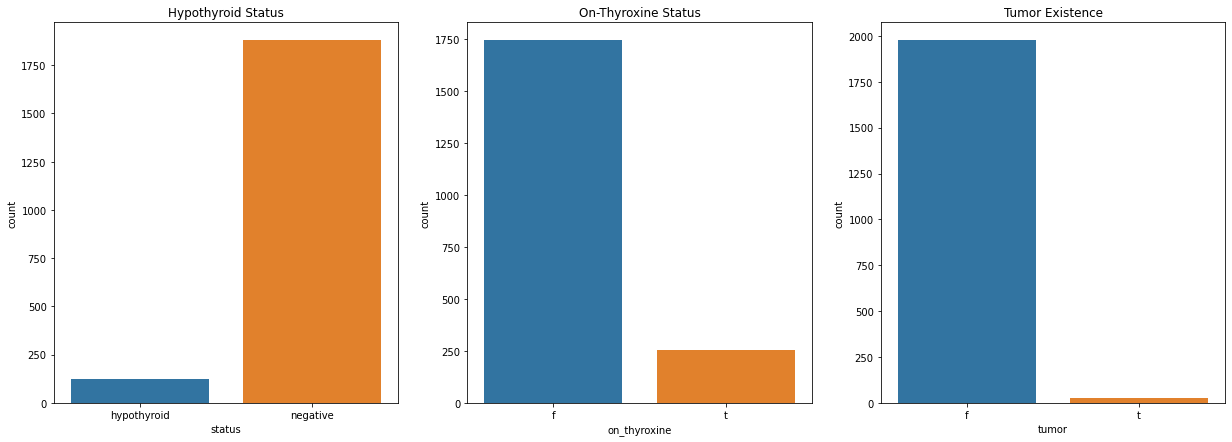

In [104]:
# plotting bar charts to check distributions

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('status',data=thyroid,ax=ax[0])
ax[0].set_title('Hypothyroid Status')
sns.countplot('on_thyroxine',data=thyroid,ax=ax[1])
ax[1].set_title('On-Thyroxine Status')
sns.countplot('tumor',data=thyroid,ax=ax[2])
ax[2].set_title('Tumor Existence')
plt.show()

## Measures of Central Tendency

In [105]:
# mean, mode and median of ages

print('Mean age is ' + str(thyroid.age.mean()))
print('Median age is ' + str(thyroid.age.median()))
print('Mode age is ' + str(thyroid.age.mode()))

Mean age is 53.6225
Median age is 57.0
Mode age is 0    60
dtype: int64


In [106]:
# mean, mode and median of TSH variable

print('Mean TSH is ' + str(thyroid.TSH.mean()))
print('Median TSH is ' + str(thyroid.TSH.median()))
print('Mode TSH is ' + str(thyroid.TSH.mode()))

Mean TSH is 6.092234999999993
Median TSH is 0.7
Mode TSH is 0    0.0
dtype: float64


# Bivariate Analysis


In this part of the analysis, we shall check for the coreelation between the dependent variable with respect to independent variables  as well as amongst the independent variable

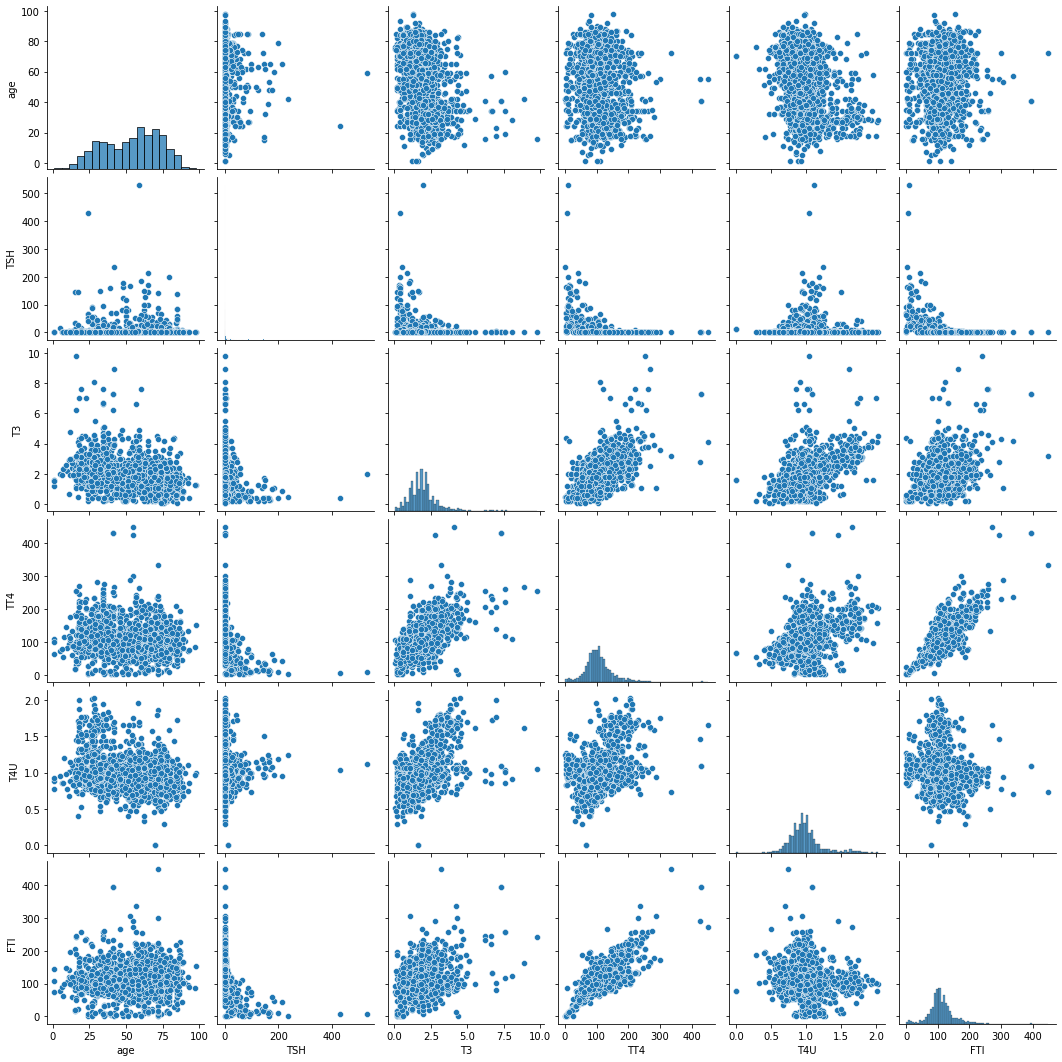

In [107]:
# Ploting the summaries and recording observations

sns.pairplot(thyroid)
plt.show()

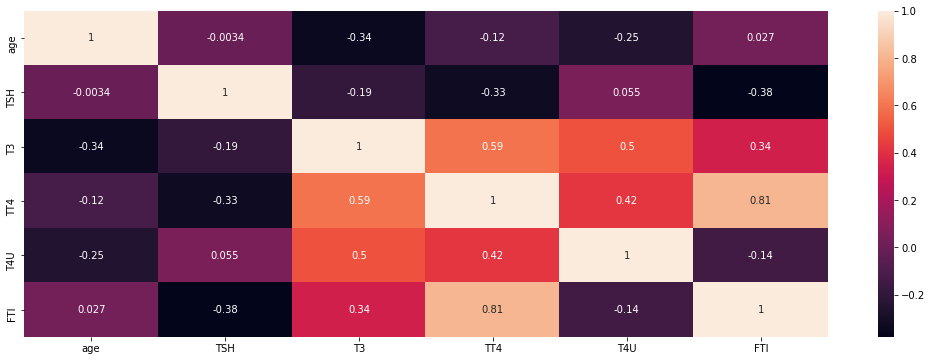

In [108]:
# Plotting the Pearson correlation coefficient among variables

plt.figure(figsize=(18, 6))
sns.heatmap(thyroid.corr(),annot=True)
plt.show()

There is a significant positive correlation between TT4 and T3, T4U and T3 as well as TT4 and FTI

In [109]:
# creating age groups with in the age for easy analysis

conditions = [
    (thyroid['age'] >= 1) & (thyroid['age'] <= 10),
    (thyroid['age'] >= 11) & (thyroid['age'] <= 20),
    (thyroid['age'] >= 21) & (thyroid['age'] <= 30),
    (thyroid['age'] >= 31) & (thyroid['age'] <= 40),
    (thyroid['age'] >= 41) & (thyroid['age'] <= 50),
    (thyroid['age'] >= 51) & (thyroid['age'] <= 60),
    (thyroid['age'] >= 61) & (thyroid['age'] <= 100),
    ]

# create a list of the values we want to assign for each condition
values = ['Below 10', '11-20', '21-30', '31-40', '41-50', '51-60', 'Above 60']

# create a new column and use np.select to assign values to it using our lists as arguments
thyroid['age_group'] = np.select(conditions, values)

# display updated DataFrame
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,age_group
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,Above 60
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,11-20
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,21-30
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,21-30
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,Above 60


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


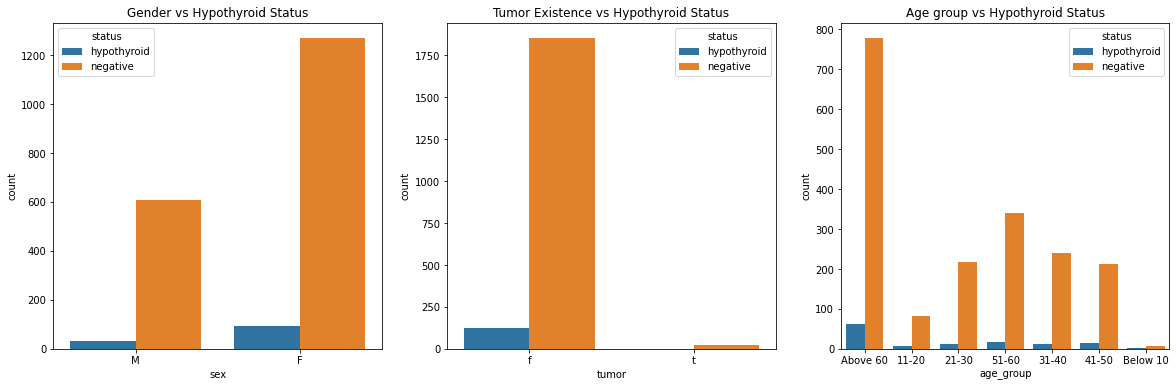

In [110]:
# comparing gender, tumor existence and age vs hypothyroid status

fig,ax=plt.subplots(1,3,figsize=(20,6))

sns.countplot('sex',hue='status',data=thyroid,ax=ax[0])
ax[0].set_title('Gender vs Hypothyroid Status')

sns.countplot('tumor',hue='status',data=thyroid,ax=ax[1])
ax[1].set_title('Tumor Existence vs Hypothyroid Status')

sns.countplot('age_group',hue='status',data=thyroid,ax=ax[2])
ax[2].set_title('Age group vs Hypothyroid Status')


for ax in fig.axes:
    plt.sca(ax)
    


plt.show()

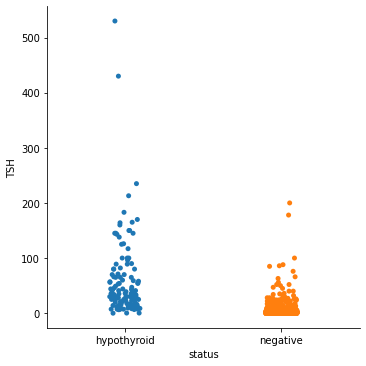

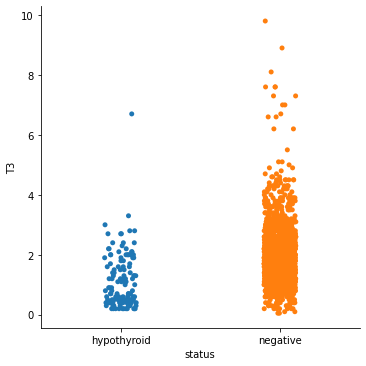

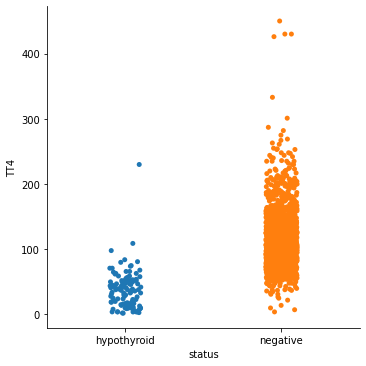

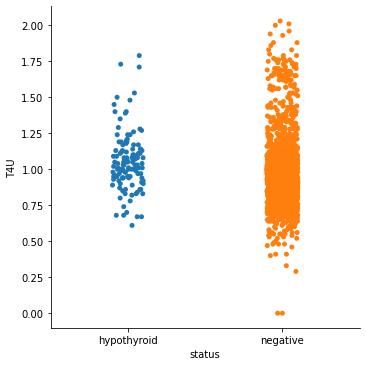

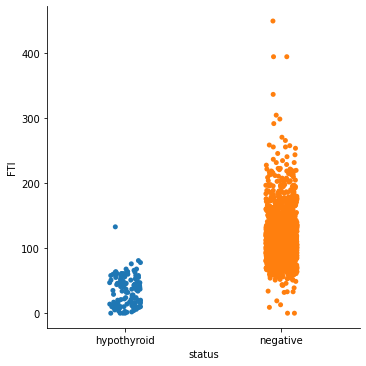

In [111]:
# comparing hypothyroid status to other numeric attributes

#sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="status", y="TSH", data=thyroid)
sns.catplot(x="status", y="T3", data=thyroid)
sns.catplot(x="status", y="TT4", data=thyroid)
sns.catplot(x="status", y="T4U", data=thyroid)
sns.catplot(x="status", y="FTI", data=thyroid)

From the graphs above, the higher the level of TSH, the higher the likelihood of the person having hypothyroid. On the other hand, the lower the level of FTI the higher the likelihood of the person having hypothyroid

In [112]:
# plotting a crosstab to compare status , gender and pregnant attributes

pd.crosstab([thyroid.sex,thyroid.pregnant],thyroid.status,margins=True).style.background_gradient(cmap='Pastel1_r')

In [113]:
# plotting a crosstab to compare status , lithium and goitre attributes

pd.crosstab([thyroid.lithium,thyroid.goitre],thyroid.status,margins=True).style.background_gradient(cmap='Pastel1_r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


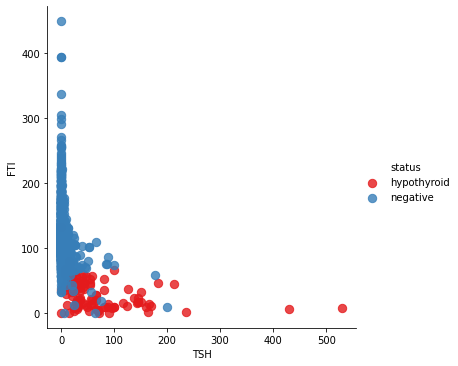

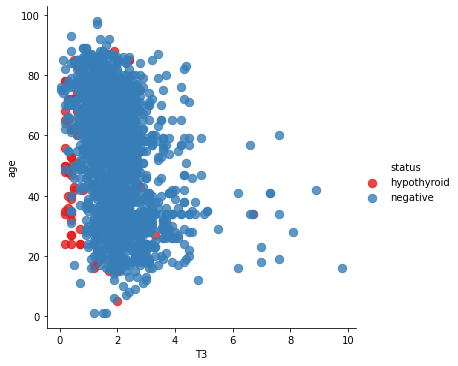

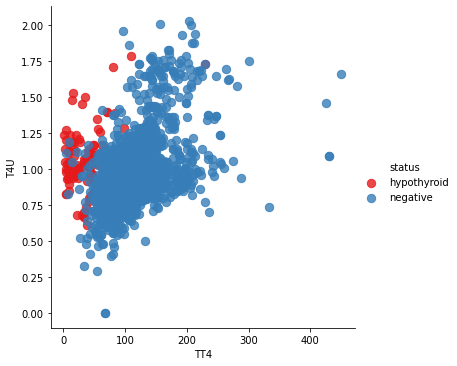

In [114]:
# Comparing numeric variables amongst each other

sns.lmplot('TSH', 'FTI', data=thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('T3', 'age', data=thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('TT4', 'T4U', data=thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# Implementing the Solution



# Feature Engineering

In [115]:
# dropping unnecessary colums

thyroid = thyroid.drop(columns=['TSH_measured', 'T3_measured',
                                'TT4_measured', 'T4U_measured', 'FTI_measured', 'age_group'])

In [116]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [117]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

thyroid['sex'] = le.fit_transform(thyroid['sex'])
thyroid['on_thyroxine'] = le.fit_transform(thyroid['on_thyroxine'])
thyroid['query_on_thyroxine'] = le.fit_transform(thyroid['query_on_thyroxine'])
thyroid['goitre'] = le.fit_transform(thyroid['goitre'])
thyroid['on_antithyroid_medication'] = le.fit_transform(thyroid['on_antithyroid_medication'])
thyroid['thyroid_surgery'] = le.fit_transform(thyroid['thyroid_surgery'])
thyroid['query_hypothyroid'] = le.fit_transform(thyroid['query_hypothyroid'])
thyroid['query_hyperthyroid'] = le.fit_transform(thyroid['query_hyperthyroid'])
thyroid['pregnant'] = le.fit_transform(thyroid['pregnant'])
thyroid['sick'] = le.fit_transform(thyroid['sick'])
thyroid['tumor'] = le.fit_transform(thyroid['tumor'])
thyroid['lithium'] = le.fit_transform(thyroid['lithium'])

thyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [119]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

thyroid['sex'] = le.fit_transform(thyroid['sex'])
thyroid['on_thyroxine'] = le.fit_transform(thyroid['on_thyroxine'])
thyroid['query_on_thyroxine'] = le.fit_transform(thyroid['query_on_thyroxine'])
thyroid['goitre'] = le.fit_transform(thyroid['goitre'])
thyroid['on_antithyroid_medication'] = le.fit_transform(thyroid['on_antithyroid_medication'])
thyroid['thyroid_surgery'] = le.fit_transform(thyroid['thyroid_surgery'])
thyroid['query_hypothyroid'] = le.fit_transform(thyroid['query_hypothyroid'])
thyroid['query_hyperthyroid'] = le.fit_transform(thyroid['query_hyperthyroid'])
thyroid['pregnant'] = le.fit_transform(thyroid['pregnant'])
thyroid['sick'] = le.fit_transform(thyroid['sick'])
thyroid['tumor'] = le.fit_transform(thyroid['tumor'])
thyroid['lithium'] = le.fit_transform(thyroid['lithium'])

thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [123]:
thyroid['status'] = thyroid['status'].astype('category')

In [124]:
#converting gender into 1 and 0
thyroid['status'] = thyroid['status'].cat.codes
print(thyroid)

      status  age  sex  on_thyroxine  ...   T3    TT4   T4U    FTI
0          0   72    1             0  ...  0.6   15.0  1.48   10.0
1          0   15    0             1  ...  1.7   19.0  1.13   17.0
2          0   24    1             0  ...  0.2    4.0  1.00    0.0
3          0   24    0             0  ...  0.4    6.0  1.04    6.0
4          0   77    1             0  ...  1.2   57.0  1.28   44.0
...      ...  ...  ...           ...  ...  ...    ...   ...    ...
3158       1   58    0             0  ...  1.7   86.0  0.91   95.0
3159       1   29    0             0  ...  1.8   99.0  1.01   98.0
3160       1   77    1             0  ...  0.6   71.0  0.68  104.0
3161       1   74    0             0  ...  0.1   65.0  0.48  137.0
3162       1   56    0             1  ...  1.8  139.0  0.97  143.0

[2000 rows x 19 columns]


0 indicates hypothyroid while 1 indicates no hypothyroid(negative)

# **Decision Trees**




# Random Forest Classifier

In [125]:
# Defining the features and target variable

my_cols = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
       'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3', 'TT4',
       'T4U', 'FTI']
X = thyroid[my_cols].values

y = thyroid['status'].values

In [126]:
# Defining the training and tests sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
# Create a random forest classifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)

# Fitting the model
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred = forest.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
193       1          1
116       1          1
19        1          1
179       1          1
260       1          1
           Actual   Predicted
count  400.000000  400.000000
mean     0.922500    0.927500
std      0.267718    0.259639
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [128]:
# Assessing model accuracy

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Mean Squared Error: 0.02
Root Mean Squared Error: 0.1414213562373095
Accuracy: 0.98
[[ 26   5]
 [  3 366]]


The above results show that Random Forest Classifier has a high accuracy level of 98%. The model has only a few misclassifications

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


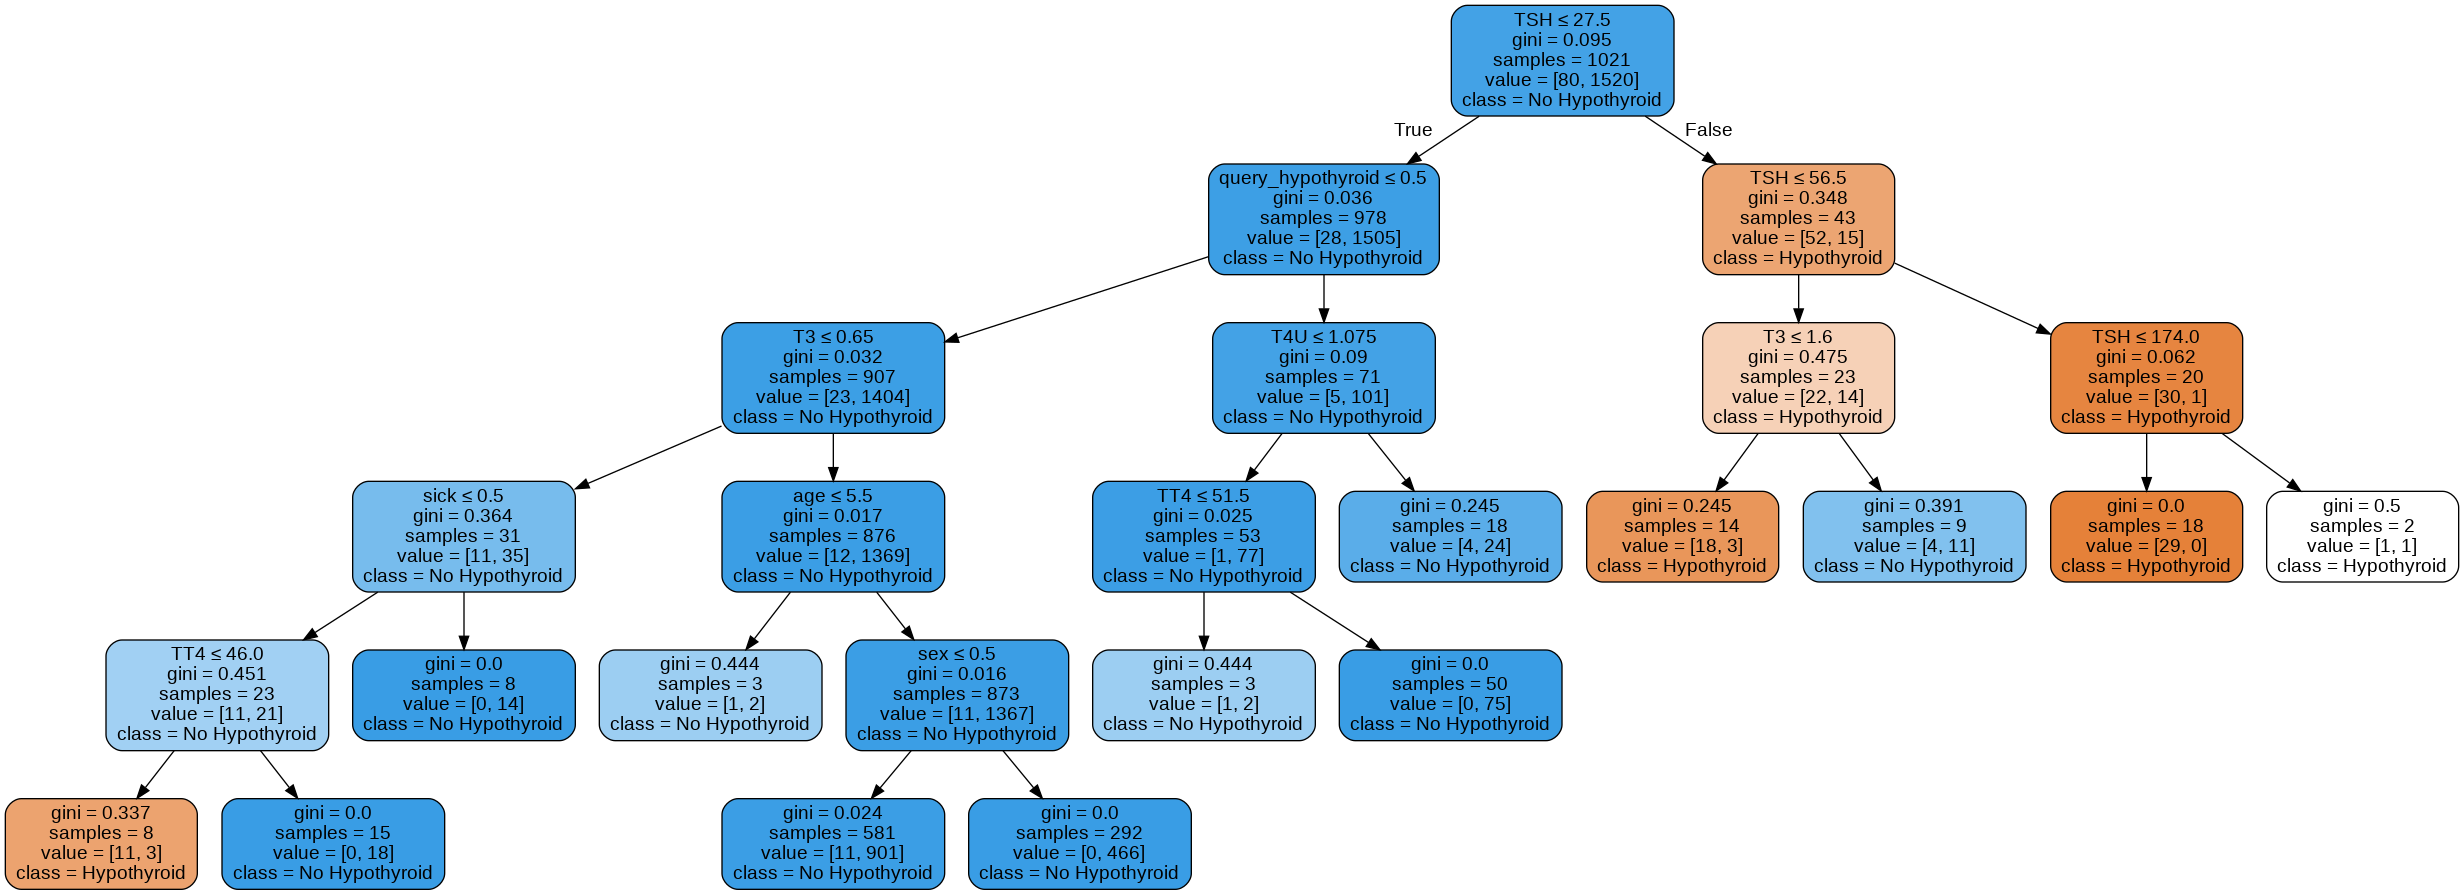

In [129]:
# Visualizing the model at random tree number 50

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picking the specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = my_cols, class_names=['Hypothyroid', 'No Hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidsm_forest.png')
Image(graph.create_png())

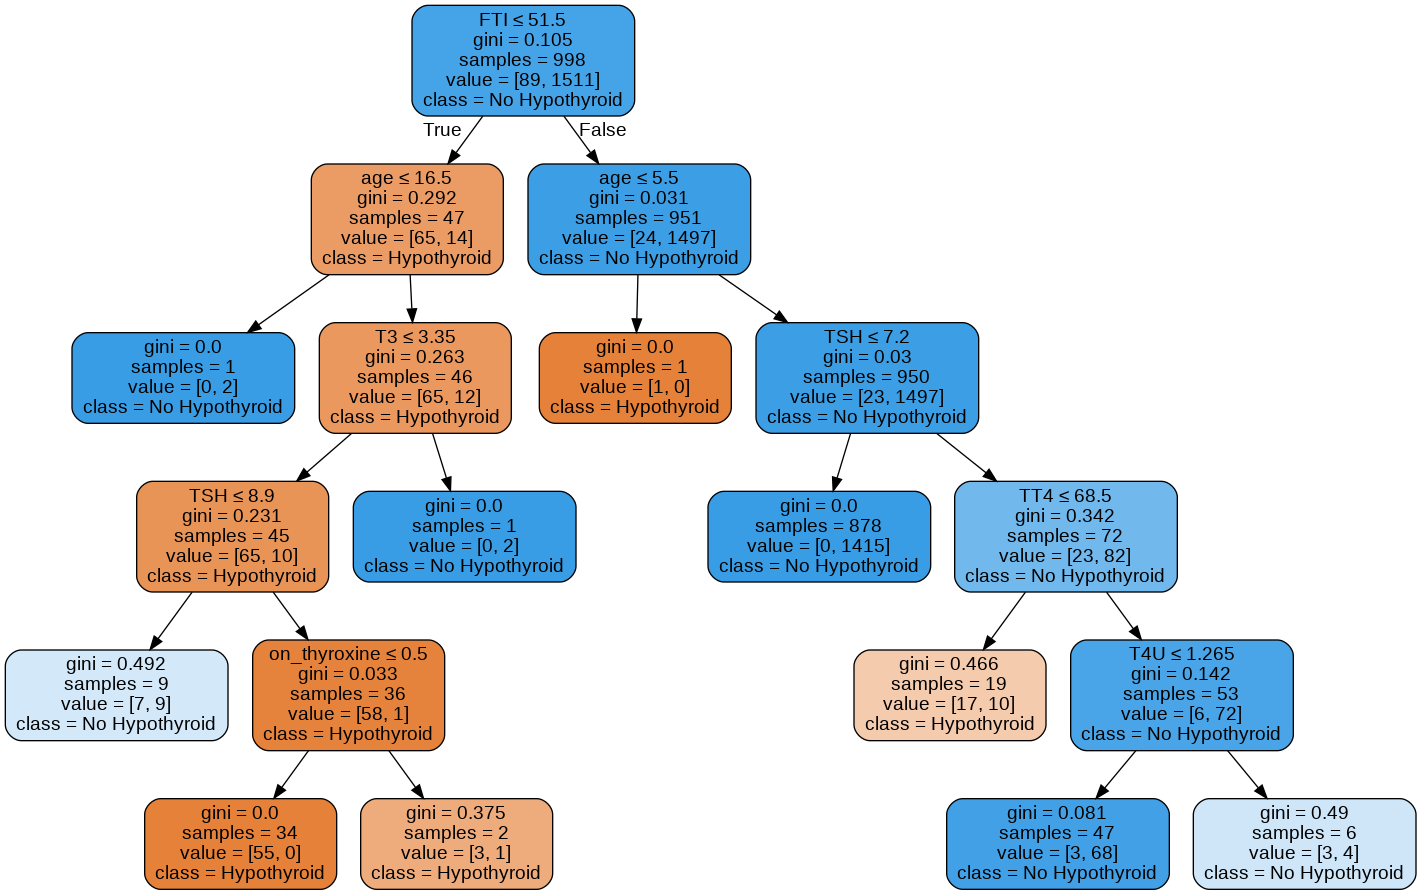

In [130]:
# at tree number 70

dot_data = StringIO()

tree = forest.estimators_[70]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = my_cols, class_names=['Hypothyroid', 'No Hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidsm_forest.png')
Image(graph.create_png())

In [131]:
# Checking the important features from the model

importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(my_cols, importances)]

# Sorting the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.12
Variable: TT4                  Importance: 0.09
Variable: age                  Importance: 0.03
Variable: T3                   Importance: 0.02
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0


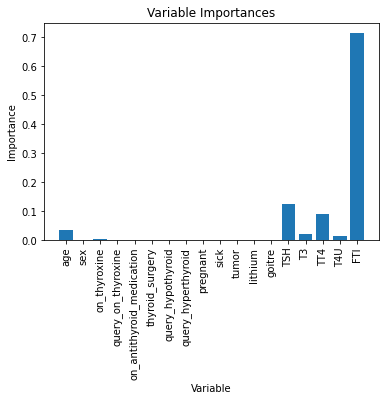

In [132]:
# visualizing feature importance

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, my_cols, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

FTI, TSH, TT4, age, T3 and T4U are the only important variables when predicting whether or not a patient has a hypothyroid condition

# Ada Boost Classifier

In [133]:
# create the ada boost classifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                          n_estimators=300, random_state=0)

# fit the model
ada_boost = ada_boost.fit(X_train, y_train)

# make prediction
y_pred_ada = ada_boost.predict(X_test)

In [134]:
# check prediction data

comparison_frame_ada = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ada.flatten()})
print(comparison_frame_ada.sample(n=5))
print(comparison_frame_ada.describe())

     Actual  Predicted
77        1          1
327       1          1
45        1          1
210       1          1
130       1          1
           Actual   Predicted
count  400.000000  400.000000
mean     0.922500    0.920000
std      0.267718    0.271633
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [135]:
# Assessing ada boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Mean Absolute Error: 0.0125
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948
Accuracy: 0.9875


Trying a different max depth level

In [136]:
# create new ada boost classifier with a different max depth

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=0)

# fit the model
ada_boost = ada_boost.fit(X_train, y_train)

# make prediction
y_pred_ada = ada_boost.predict(X_test)

# Assessing new ada boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Mean Absolute Error: 0.01
Mean Squared Error: 0.01
Root Mean Squared Error: 0.1
Accuracy: 0.99


Comparing the ada boost classifier to the random forest classifier, Ada boost has a reduced RMSE value and an improved accuracy score. In addition, a max depth of 4 improves the model performance even more compared to a max depth of 2

In [137]:
# Get numerical feature importances
importances = list(ada_boost.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(my_cols, importances)]


# Sort the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.2
Variable: age                  Importance: 0.16
Variable: T4U                  Importance: 0.16
Variable: FTI                  Importance: 0.16
Variable: T3                   Importance: 0.11
Variable: TT4                  Importance: 0.09
Variable: query_hypothyroid    Importance: 0.04
Variable: sex                  Importance: 0.02
Variable: on_thyroxine         Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.02
Variable: thyroid_surgery      Importance: 0.01
Variable: query_hyperthyroid   Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0


We can see that TSH, age, T4U , FTI and T3 are the most important in prediction the likelyhood of have hypothyroid.

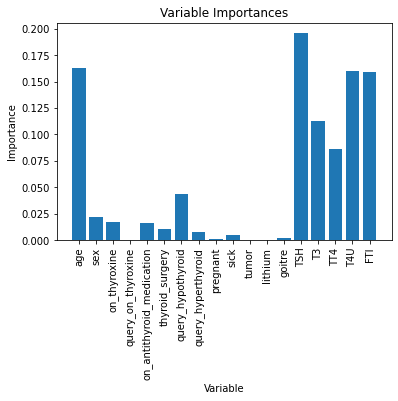

In [138]:
# visualizing feature importance

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, my_cols, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Gradient Boosting Classifier

In [139]:
# specifying the number of trees
target_number_of_trees = 200

# create the gradient boosting classifier
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)

# train the model
gbr = gbr.fit(X_train, y_train)

# make prediction
y_pred_gbr = gbr.predict(X_test)

In [140]:
# Assessing gradient boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Mean Absolute Error: 0.01
Mean Squared Error: 0.01
Root Mean Squared Error: 0.1
Accuracy: 0.99


The gradient boost model performs really well, the high accuracy score 99% there could be overffiting. We can adjust the hyperparameters i.e. learning rate, max depth and number of trees to improve the model further

In [141]:
# adjusting the hyperparameters (no. of trees = 50, learning rate = 0.5, max_depth = 4)

target_number_of_trees = 50
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.5, max_depth=4)
gbr = gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Assessing new gradient boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Mean Absolute Error: 0.0175
Mean Squared Error: 0.0175
Root Mean Squared Error: 0.13228756555322954
Accuracy: 0.9825


In [142]:
# adjusting the hyperparameters (no. of trees = 100, learning rate = 0.3, max_depth = 4)

target_number_of_trees = 100
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.3, max_depth=4)
gbr = gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Assessing new gradient boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Mean Absolute Error: 0.0125
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948
Accuracy: 0.9875


The optimal hyperparameters given an accuracy score of 98.75% are: no. of trees = 100, learning rate = 0.3 and max_depth = 4

In [143]:
# Get numerical feature importances
importances = list(gbr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(my_cols, importances)]

#  sort the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.61
Variable: TSH                  Importance: 0.23
Variable: age                  Importance: 0.04
Variable: on_antithyroid_medication Importance: 0.03
Variable: on_thyroxine         Importance: 0.02
Variable: query_hypothyroid    Importance: 0.02
Variable: T3                   Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: thyroid_surgery      Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0


gradient boost imply that FTI and TSH is the most important when predicting the likelyhood of hypothyroid

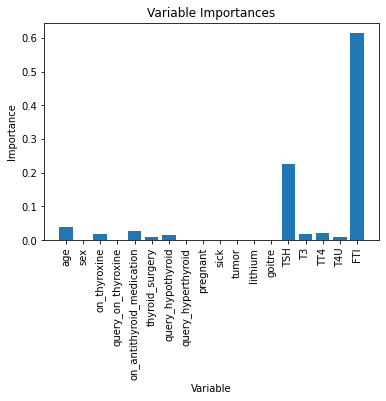

In [144]:
# visualizing feature importance

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, my_cols, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [145]:
# comparing accuracy scores of all three models

print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Ada Boost Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("Gradient Boost Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Random Forest Classifier Accuracy: 0.98
Ada Boost Classifier Accuracy: 0.99
Gradient Boost Classifier Accuracy: 0.9875


From the results above, we see that Ada Boost and Gradient Boost classifiers perform better than Random Forest Classifier.

Although Ada Boost and Gradient Boost classifiers perform similarly, the former gives small weights to a large number of variables while the latter puts a lot more weight on a few variables. Since Ada Boost is generally more vulnerable to overfitting, I would recommend choosing Gradient Boosting Classifier for this particular research problem.

The hyperparameters of the Gradient Boost Classifier can be adjusted further to optimize the performance of the model

## Support Vector Machines (SVM)

# Linear SVM

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


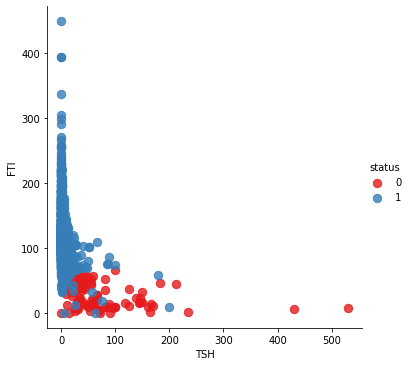

In [146]:
# Plotting FTI and TSH based on hypothyroid status

sns.lmplot('TSH', 'FTI', data=thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [147]:
# Redefining the features and target variable

X = thyroid[['TSH', 'FTI']].values

y = thyroid['status'].values

# Defining the training and tests sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model

model = SVC(kernel= 'linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
# Predict the response for the test set

y_pred_linSVM = model.predict(X_test)
comparison_frame_linSVM = pd.DataFrame({'Actual':y_test, 'Predicted_linSVC':y_pred_linSVM})
comparison_frame_linSVM


,Actual,Predicted_linSVC
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
395,1,1
396,1,1
397,1,1
398,1,1


In [149]:
# Checking the accurancy of the model

model_accuracy = accuracy_score(y_test,y_pred_linSVM)
print('Accuracy score: ', model_accuracy)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linSVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linSVM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linSVM)))
print('R2_score:' ,r2_score(y_test, y_pred_linSVM))

Accuracy score:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
R2_score: 0.7901914503015998


The linear SVM has a classification rate of 98.5%. This is a pretty good accuracy score although slightly lower than the Gradient Boost Classifier

# Polynomial SVM

In [150]:
# Building the model 

polyclassifier = SVC(kernel='poly',degree=3,gamma=2**-5)

# Training the model using the training set

polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation

print('Accuracy: ', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Accuracy:  0.97
Mean Absolute Error: 0.03
Mean Squared Error: 0.03
Root Mean Squared Error: 0.17320508075688773


In [152]:
# Polynomial classifier with a different gamma value

polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('R2_score:' ,r2_score(y_test, y_pred_poly))

Accuracy:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
R2_score: 0.7901914503015998


The polynomial SVM does not improve the model performance much further compared to the linear SVM

# Radial basis function (rbf)

In [153]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [154]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))
print('R2_score:' ,r2_score(y_test, y_pred_rbf))

Accuracy:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
R2_score: 0.7901914503015998


Out of all SVM models, this optimized rbf model performs best with an improved R2 and Accuracy score as well as reduced RMSE value

Hyperparameter tuning on rbf kernel

In [155]:
# define C and gamma range

C_range=list(range(1,10))
gamma_range = [0.0001, 0.001, 0.01, 1, 10]

# fit the C and gamma range on parameter grid
parameter_grid = dict(gamma=gamma_range, C=C_range)

#  find the best parameters and best model score
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='accuracy')

# fit the grid model
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.0001, 0.001, 0.01, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [156]:
# find optimal parameters

best_parameters = grid.best_params_

print(best_parameters)

{'C': 5, 'gamma': 0.001}


In [157]:
# fit model with above parameters

rbfclassifier = SVC(kernel='rbf', C = 5, gamma = 0.001)

rbfclassifier.fit(X_train, y_train)

y_pred_rbf2 = rbfclassifier.predict(X_test)

# Model Evaluation

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf2)))
print('R2_score:' ,r2_score(y_test, y_pred_rbf2))
print('Accuracy Score :', accuracy_score(y_test,y_pred_rbf2))

Mean Absolute Error: 0.0125
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948
R2_score: 0.8251595419179998
Accuracy Score : 0.9875




*   Updating the optimized rbf model with the remaining features



In [158]:
# Redefining the features and target variable

X = thyroid.drop('status', 1)
y = thyroid['status']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [159]:
# Defining the optimised rbf model

rbfclassifier = SVC(kernel='rbf', gamma=0.001, C=5)

# Fitting the model
rbfclassifier.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [160]:
# making prediction
y_pred_final = rbfclassifier.predict(X_test)

# Model Evaluation
print('Optimized rbf Accuracy: ', accuracy_score(y_test, y_pred_final))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_final))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_final))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_final)))
print('Optimized rbf R2_score:' ,r2_score(y_test, y_pred_final))

Optimized rbf Accuracy:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
Optimized rbf R2_score: 0.7232153154192134






*   The optimized rbf model with all features performs poorly when compared to the optimized rbf model with only two features.



*   Overall, when using all features available in the dataset, gradient boosted classifier had a slightly better performance (accuracy score = 0.9875) compared to rbf SVM (accuracy score = 0.985)





# findings and recomendation


Below is a summary of the accuracy scores for each model implemented in this analysis:

*   Random Forest Classifier - 0.98
*   Ada Boost Classifier - 0.9925
*   Gradient Boost Classifier - 0.9875
*   Linear SVM - 0.985
*   Polynomial SVM - 0.985
*   Optimized Radial Basis Function SVM - 0.9875
*   Optimized Rbf SVM (with all features) - 0.985




Overall, Ada Boost Classifier had the highest performance although it demonstrates a likelihoof of overfitting. The optimized rbf model with only two features performs well but the model's accuracy score decreases when more features are added to the model.

In this case,  the Gradient Boost Classifier should be recomended to be used as the best classification model since it has a high performance and incorporates all relevant features available in the dataset.

